<center><img src="https://raw.githubusercontent.com/usmanjohn/BA_project/main/batman.png" alt="drawing" width="300"/></center>

<center><h1>Combined Movie Recommendation Systems</h1><h2>Interception of Collaborative & Content - Based Recommenders</h2><center>

### Importing main libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for visualizing in the environment
%matplotlib inline

# to ignore copy warning
pd.set_option('mode.chained_assignment', None)

### Reading the datasets

In [11]:
rating = pd.read_csv('movie_ratings.csv')
content = pd.read_csv('movie_content.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,6,4.0,964982224
2,1,70,3.0,964982400
3,1,110,4.0,964982176
4,1,163,5.0,964983650


In [12]:
rating.shape

(46151, 4)

In [13]:
content.head(3)

,movieId,genres,original_title,id,overview,actors,director
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,862,"Led by Woody, Andy's toys live happily in his ...","['tomhanks', 'timallen', 'donrickles']",johnlasseter
1,2,Adventure|Children|Fantasy,Jumanji,8844,When siblings Judy and Peter discover an encha...,"['robinwilliams', 'jonathanhyde', 'kirstendunst']",joejohnston
2,6,Action|Crime|Thriller,Heat,949,"Obsessive master thief, Neil McCauley leads a ...","['alpacino', 'robertdeniro', 'valkilmer']",michaelmann


In [14]:
content.shape

(1666, 7)

In [15]:
rating.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [16]:
content.isna().sum()

movieId           0
genres            0
original_title    0
id                0
overview          0
actors            0
director          0
dtype: int64

#### Getting titles of movies for rating dataset from content dataset

In [17]:
# when merging, how = left should be set
rating = pd.merge(rating, 
                  content[['movieId', 'original_title']],
                  how = 'left')

In [18]:
# We don't need timestamp column
rating.drop('timestamp', axis =1 ,inplace = True)

<center><h1>🎬 🎥 🎞 📺 📉 📊</h1><h2>Data Analysis</h2></center>

### Rating Dataset analysis

#### Let's see the distribution of ratings

Text(0.5, 1.0, 'Distribution of Rating')

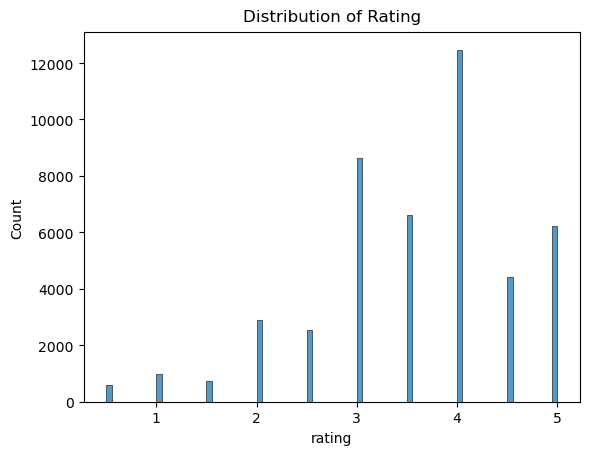

In [19]:
sns.histplot(rating, x = 'rating')
plt.title('Distribution of Rating',pad = 8)

In [20]:
rating['rating'].value_counts()

4.0    12471
3.0     8626
3.5     6628
5.0     6226
4.5     4422
2.0     2909
2.5     2546
1.0      998
1.5      734
0.5      591
Name: rating, dtype: int64

#### Let's see the movies with ratings count and sum

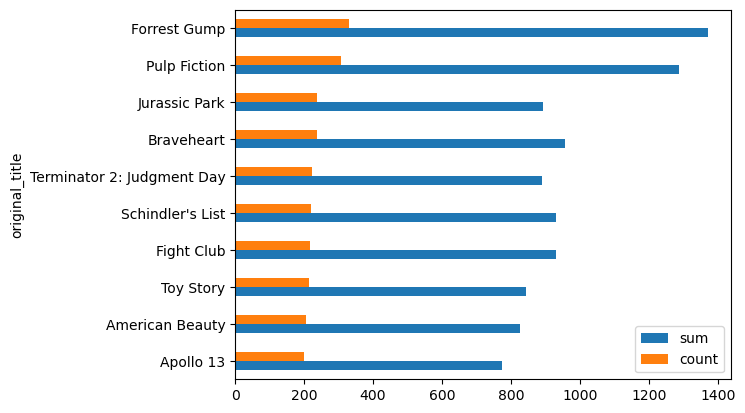

In [36]:
# First we will groupby then plot
most_rated = rating.groupby('original_title')['rating'].agg(['sum','count'])
most_rated_10 = most_rated.sort_values('count',ascending=False)
most_rated_10 = most_rated_10.nlargest(columns = 'count',n =  10)
most_rated_10 = most_rated_10.sort_values('count',ascending=True)
most_rated_10.plot(kind = 'barh');

**Result:** <br>
**1.** Forrest Gump is **leading** with **highest number** and **greatest sum** of ratings;<br>
**2.** Jurassic Park, despite having **more counts** of rating, has **lower sum** of ratings **compared to** Braveheart and **some** other movies;

#### Let's see the users rating count

In [10]:
rating['userId'].value_counts().nlargest(10)

414    814
448    759
249    686
599    667
68     642
380    620
610    612
274    593
298    512
177    477
Name: userId, dtype: int64

**Result:** **User 414** gave the ratings **the most**, to **814 movies**, let's see the **ratings distribution** of particular user

<AxesSubplot:title={'center':'User 414 ratings distribution'}, ylabel='rating'>

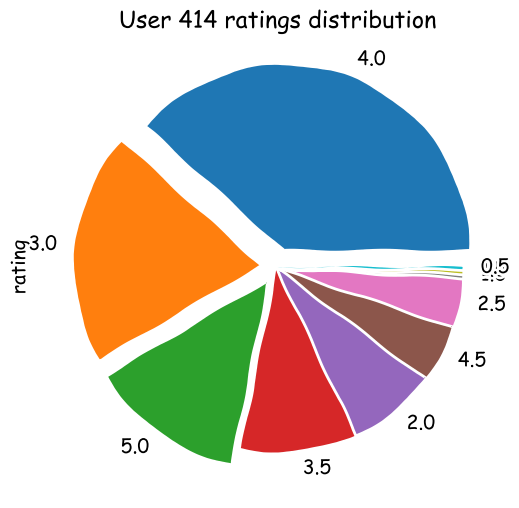

In [11]:
plt.xkcd() # this changes visualization to comedy type
plt.figure(figsize = (9,6))
#taking only 414 user
user_414 = rating[rating['userId']==414]['rating'].value_counts()
user_414.plot(kind = 'pie',
              title = 'User 414 ratings distribution',
              explode = [0.1,0.1,0.1,0,0,0,0,0,0,0])

**Result:** We can see that the **user 414** gave **4 rating** for the **majority** of the movies

### Content dataset analysis

In [12]:
content = content.drop_duplicates('original_title')
content = content.reset_index(drop = True)

In [13]:
genres_count=content['genres'].str.split('|',expand=True).stack().value_counts()
df_genres = genres_count.reset_index()
df_genres.columns = ['genres', 'count']

Text(0.5, 1.0, 'Frequency of Genres')

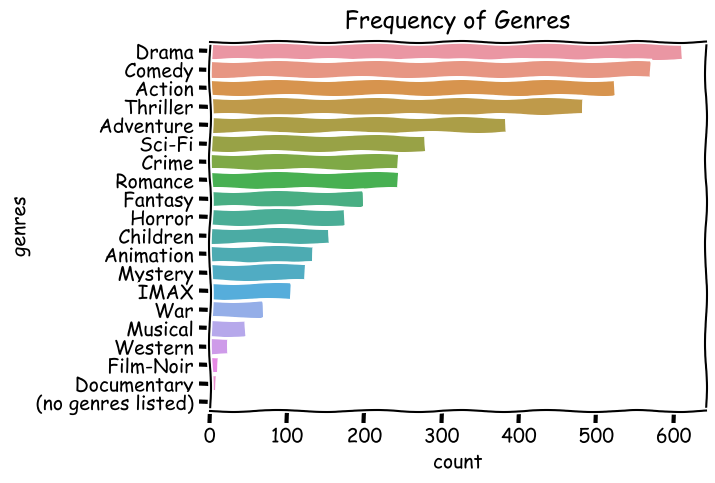

In [14]:
sns.barplot(data = df_genres, 
            x = 'count',
            y = 'genres')
plt.title('Frequency of Genres', pad = 10)

In [15]:
content.head(3)

,movieId,genres,original_title,id,overview,actors,director
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,862,"Led by Woody, Andy's toys live happily in his ...","['tomhanks', 'timallen', 'donrickles']",johnlasseter
1,2,Adventure|Children|Fantasy,Jumanji,8844,When siblings Judy and Peter discover an encha...,"['robinwilliams', 'jonathanhyde', 'kirstendunst']",joejohnston
2,6,Action|Crime|Thriller,Heat,949,"Obsessive master thief, Neil McCauley leads a ...","['alpacino', 'robertdeniro', 'valkilmer']",michaelmann


In [16]:
# We will use these colors for the rest
color = ['#6E7B8B','#F08080','#F0E68C','#7CCD7C','#CDBA96',
         '#FFE1FF','#CAFF70','#B23AEE',
         '#EE1289','#C6E2FF']

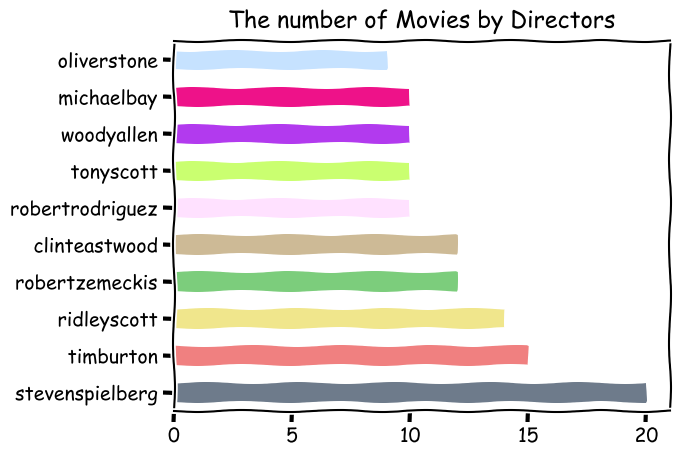

In [17]:
plot_dir=content['director'].value_counts().nlargest(10)
plot_dir.plot(kind = 'barh',color = color)
plt.title('The number of Movies by Directors', pad = 10);

<AxesSubplot:title={'center':'Actors appearance'}>

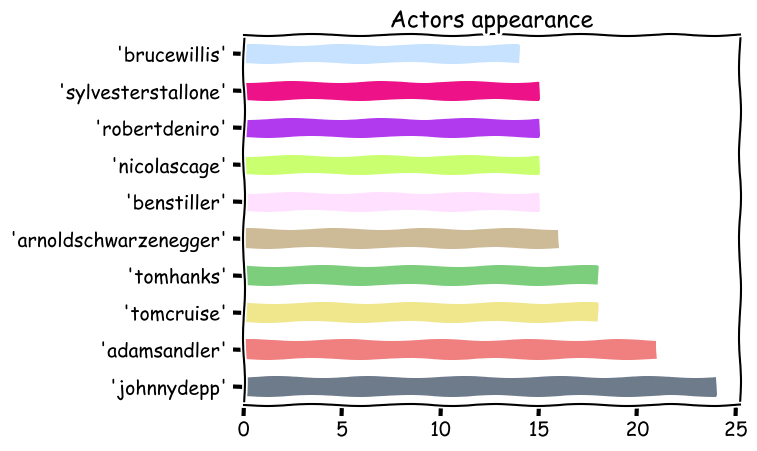

In [18]:
# actors column has three main actors, so we should split them first
content['actors'] = content['actors'].str.replace(']','',regex = True).str.replace('[','', regex = True)
actors_plot = content['actors'].str.split(',',expand = True).stack().value_counts()
actors_plot.nlargest(10).plot(kind = 'barh',
                              color = color, 
                              title = 'Actors appearance' )

<center><h1>😡😕😐😊😄</h1><h2>Rating - Based Recommender</h2><br></center>

<center><img src="https://raw.githubusercontent.com/usmanjohn/BA_project/main/marvel.jpeg" alt="drawing" width="300"/></center>

### Step 1: Preprocessing

We will create **pivot table** from **rating dataset**, using the following:<br> **-titles** as ***indexes***;<br> **-users** as ***columns***; <br>**-ratings** as ***values*** 

In [19]:
pivot_rating = pd.pivot_table(rating, 
                              index = 'original_title', 
                              values = 'rating', 
                              columns = 'userId').fillna(0)

In [20]:
pivot_rating.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
original_title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
10 Cloverfield Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
10 Things I Hate About You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
"10,000 BC",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [21]:
pivot_rating.shape

(1570, 610)

***Result:*** As seen from the ***shape*** of dataset, we have **1510 movies** rated by **610 users**

### Step 2: Nearest Neighbors Fitting

1. We use **Nearest Neighbors** to fit our model.


**Scikit Learn:** NearestNeighbors implements **unsupervised nearest neighbors** learning.

**Cosine Similarity:**
cosine similarity is a measure of similarity between two sequences of numbers. For defining it, the sequences are viewed as vectors in an inner product space, and the cosine similarity is defined as the cosine of the angle between them, that is, the dot product of the vectors divided by the product of their lengths

In [22]:
from sklearn.neighbors import NearestNeighbors
# we will use cosine similarity method
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(pivot_rating)

NearestNeighbors(algorithm='brute', metric='cosine')

2. For finding **closest k neighbors**, we first should decide for **which movie** we will recommend:<br>
The code below will help us to **find** a *movie* and its *index*

Now, Let's say we want to find movies **rated similarly** as **'Harry Poter'**.<br>
As we don't know where the movie **'Harry Poter'** itself is **located**, we should **find** its **location**.

In [23]:
for index, name in enumerate(pivot_rating.index):
    if 'Harry' in name:
        print('{name} movie with index {index}'.format(name=name,
                                                       index=index))

Dirty Harry movie with index 371
Harry Potter and the Chamber of Secrets movie with index 582
Harry Potter and the Deathly Hallows: Part 1 movie with index 583
Harry Potter and the Deathly Hallows: Part 2 movie with index 584
Harry Potter and the Goblet of Fire movie with index 585
Harry Potter and the Half-Blood Prince movie with index 586
Harry Potter and the Order of the Phoenix movie with index 587
Harry Potter and the Prisoner of Azkaban movie with index 588
When Harry Met Sally... movie with index 1520


Above, we can see there are **9 movies**, and let's choose the **movie**, whose **index** is 587. 

### Step 3: Prediction: Nearest Neighbors

As we are **predicting** for the movie whose **index 587**, we will assign **this value as i**;<br>
Because later if we want to predict for **another movie**, it is **enough** to change **i than** always changing the **index number**<br>
We will find **20 similar** movies, so **n_neighbors = 21** (including the **concerned** movie itself)

In [24]:
i = 587 # movie's index, for which we will find nearest movies 
suggestions = [] # empty list for appending the closest movies

# distances -> cosine similarity of closest movies;
# indices means the index of similar movies;
distances, indices = model_knn.kneighbors(pivot_rating.iloc[i,:].values.reshape(1, -1), 
                                          n_neighbors = 21)

for b in range(0, len(distances.flatten())):
    
    if b == 0: 
        # the first movie, concerned movie itself
        print('Recommendations for {0}:\n'.format(pivot_rating.index[i]))
    else:
        #appending the suggested movies to suggestions list
        suggestions.append(pivot_rating.index[indices.flatten()[b]]) 
        
        # just printing the movies with their similarity score
        print('{0}: {1}, with distance of {2}:'.format(b, 
                                                       pivot_rating.index[indices.flatten()[b]], 
                                                       round(distances.flatten()[b],2)))

Recommendations for Harry Potter and the Order of the Phoenix:

1: Harry Potter and the Goblet of Fire, with distance of 0.24:
2: Harry Potter and the Half-Blood Prince, with distance of 0.29:
3: Harry Potter and the Deathly Hallows: Part 1, with distance of 0.31:
4: Harry Potter and the Chamber of Secrets, with distance of 0.33:
5: Harry Potter and the Prisoner of Azkaban, with distance of 0.34:
6: Harry Potter and the Deathly Hallows: Part 2, with distance of 0.34:
7: Cars, with distance of 0.51:
8: Up, with distance of 0.52:
9: Charlie and the Chocolate Factory, with distance of 0.52:
10: The Hunger Games, with distance of 0.53:
11: Pirates of the Caribbean: Dead Man's Chest, with distance of 0.53:
12: What Women Want, with distance of 0.53:
13: Avatar, with distance of 0.53:
14: Juno, with distance of 0.53:
15: Fantastic Four, with distance of 0.53:
16: Star Wars: Episode III - Revenge of the Sith, with distance of 0.53:
17: Spider-Man 3, with distance of 0.54:
18: The Hobbit: The 

**Results:** Our model is giving recommendations **quite logical**; <br>
Because those who watch **Harry Poter's series** will probably watch most of these movies, as they are **quite similar** and continuation of the movie.

<center><h1>📝 🟰 🔖</h1><h2>Content - Based Recommender</h2><br></center>

<center><img src="https://raw.githubusercontent.com/usmanjohn/BA_project/main/harry.jpeg" alt="drawing" width="300" height = "50"/></center>

In [25]:
content = content.drop_duplicates('original_title')

In [26]:
content = content.reset_index(drop = True)

In [27]:
content.head(3)

,movieId,genres,original_title,id,overview,actors,director
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,862,"Led by Woody, Andy's toys live happily in his ...","'tomhanks', 'timallen', 'donrickles'",johnlasseter
1,2,Adventure|Children|Fantasy,Jumanji,8844,When siblings Judy and Peter discover an encha...,"'robinwilliams', 'jonathanhyde', 'kirstendunst'",joejohnston
2,6,Action|Crime|Thriller,Heat,949,"Obsessive master thief, Neil McCauley leads a ...","'alpacino', 'robertdeniro', 'valkilmer'",michaelmann


### Step 1: Preprocessing
Content based recommendation is mainly **based on the description** of the movies;<br>
We will take **special keywords** from the movie **description** and make the **cluster of movies** from these **keywords**

In this step, we will take **actors, directors** and the **overview** alltogther and assign it to the **description** column

In [28]:
content['description'] = content['overview']+","+content['actors']+","+content['director']

In [29]:
content.head(3)

,movieId,genres,original_title,id,overview,actors,director,description
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,862,"Led by Woody, Andy's toys live happily in his ...","'tomhanks', 'timallen', 'donrickles'",johnlasseter,"Led by Woody, Andy's toys live happily in his ..."
1,2,Adventure|Children|Fantasy,Jumanji,8844,When siblings Judy and Peter discover an encha...,"'robinwilliams', 'jonathanhyde', 'kirstendunst'",joejohnston,When siblings Judy and Peter discover an encha...
2,6,Action|Crime|Thriller,Heat,949,"Obsessive master thief, Neil McCauley leads a ...","'alpacino', 'robertdeniro', 'valkilmer'",michaelmann,"Obsessive master thief, Neil McCauley leads a ..."


### Step 2: TfId Vectorizer

<h5>Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.<br>
    It combines 2 concepts, Term Frequency (TF) and Document Frequency (DF).</h5>

In [30]:
#Importing TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Defining a TF-IDF Vectorizer Object &
#Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#The description of movies
content['description'] = content['description'].fillna('')

#Construct the required TF-IDF matrix by fitting&transforming
tfidf_matrix = tfidf.fit_transform(content['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(1570, 13854)

**Results:** From the **shape** of the matrix above, **13854 keywords** are used to describe **1570 movies**

### Step 3: Finding similarity of keywords by each movie

In [31]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [32]:
indices_1 = pd.Series(content.index,
                      index=content['original_title']).drop_duplicates()

### Step 4: Function that will return similar movies for concerned movie

In [33]:
# Function that outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices_1[title]

    # Get the pairwsie similarity scores of all movies
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1],
                        reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:21]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 20 most similar movies
    print()
    return content['original_title'].iloc[movie_indices]

As our function is **ready**, let's look at the **results** for some of the movies

### Step 5: Prediction

In [34]:
# The same movie from our Ranking-Based Recommender
get_recommendations(pivot_rating.index[i])

989     Harry Potter and the Deathly Hallows: Part 1
894           Harry Potter and the Half-Blood Prince
673              Harry Potter and the Goblet of Fire
1038    Harry Potter and the Deathly Hallows: Part 2
594         Harry Potter and the Prisoner of Azkaban
500          Harry Potter and the Chamber of Secrets
452                                      Dirty Harry
213                                       Armageddon
1205                                       Prisoners
1327       The Hobbit: The Battle of the Five Armies
1192                                    Blue Jasmine
1047                             Final Destination 5
1217                                    Ender's Game
148                          When Harry Met Sally...
45                                         True Lies
201                                           Sphere
1254                                            Noah
278                                          Rocky V
1350                                  Doctor S

**Results**: We are getting 20 **similar movies** by their **description**.

<center><h2>Rating - Based Cluster 🔗🖇 Content - Based Cluster</h2></center>

<center><img src="https://raw.githubusercontent.com/usmanjohn/BA_project/main/intersection.png" alt="drawing" width="300"/></center>

Below is the code for taking the **interception** of ***Rating - Based Cluster*** and ***Content - Based Cluster***

In [35]:
# df is the dataframe of movies from content based cluster
df = pd.DataFrame(get_recommendations(pivot_rating.index[i]))
# We are referring to the movie concerned on rating - based

# suggestions is the list of movies from ranking - based cluster 
interception = df[df['original_title'].isin(suggestions)]
# The case of content and rating clusters interception

In [36]:
print(interception)

                                    original_title
989   Harry Potter and the Deathly Hallows: Part 1
894         Harry Potter and the Half-Blood Prince
673            Harry Potter and the Goblet of Fire
1038  Harry Potter and the Deathly Hallows: Part 2
594       Harry Potter and the Prisoner of Azkaban
500        Harry Potter and the Chamber of Secrets
1327     The Hobbit: The Battle of the Five Armies


<center><h2>The visualization of both clusters & Interception</h2></center>

In [37]:
# movie in target 
movie_name = pivot_rating.index[i]
#title for ranking-based cluster
title_rank="Ranking-Based Cluster"
#title for content-based cluster
title_content="Content-Based Cluster"

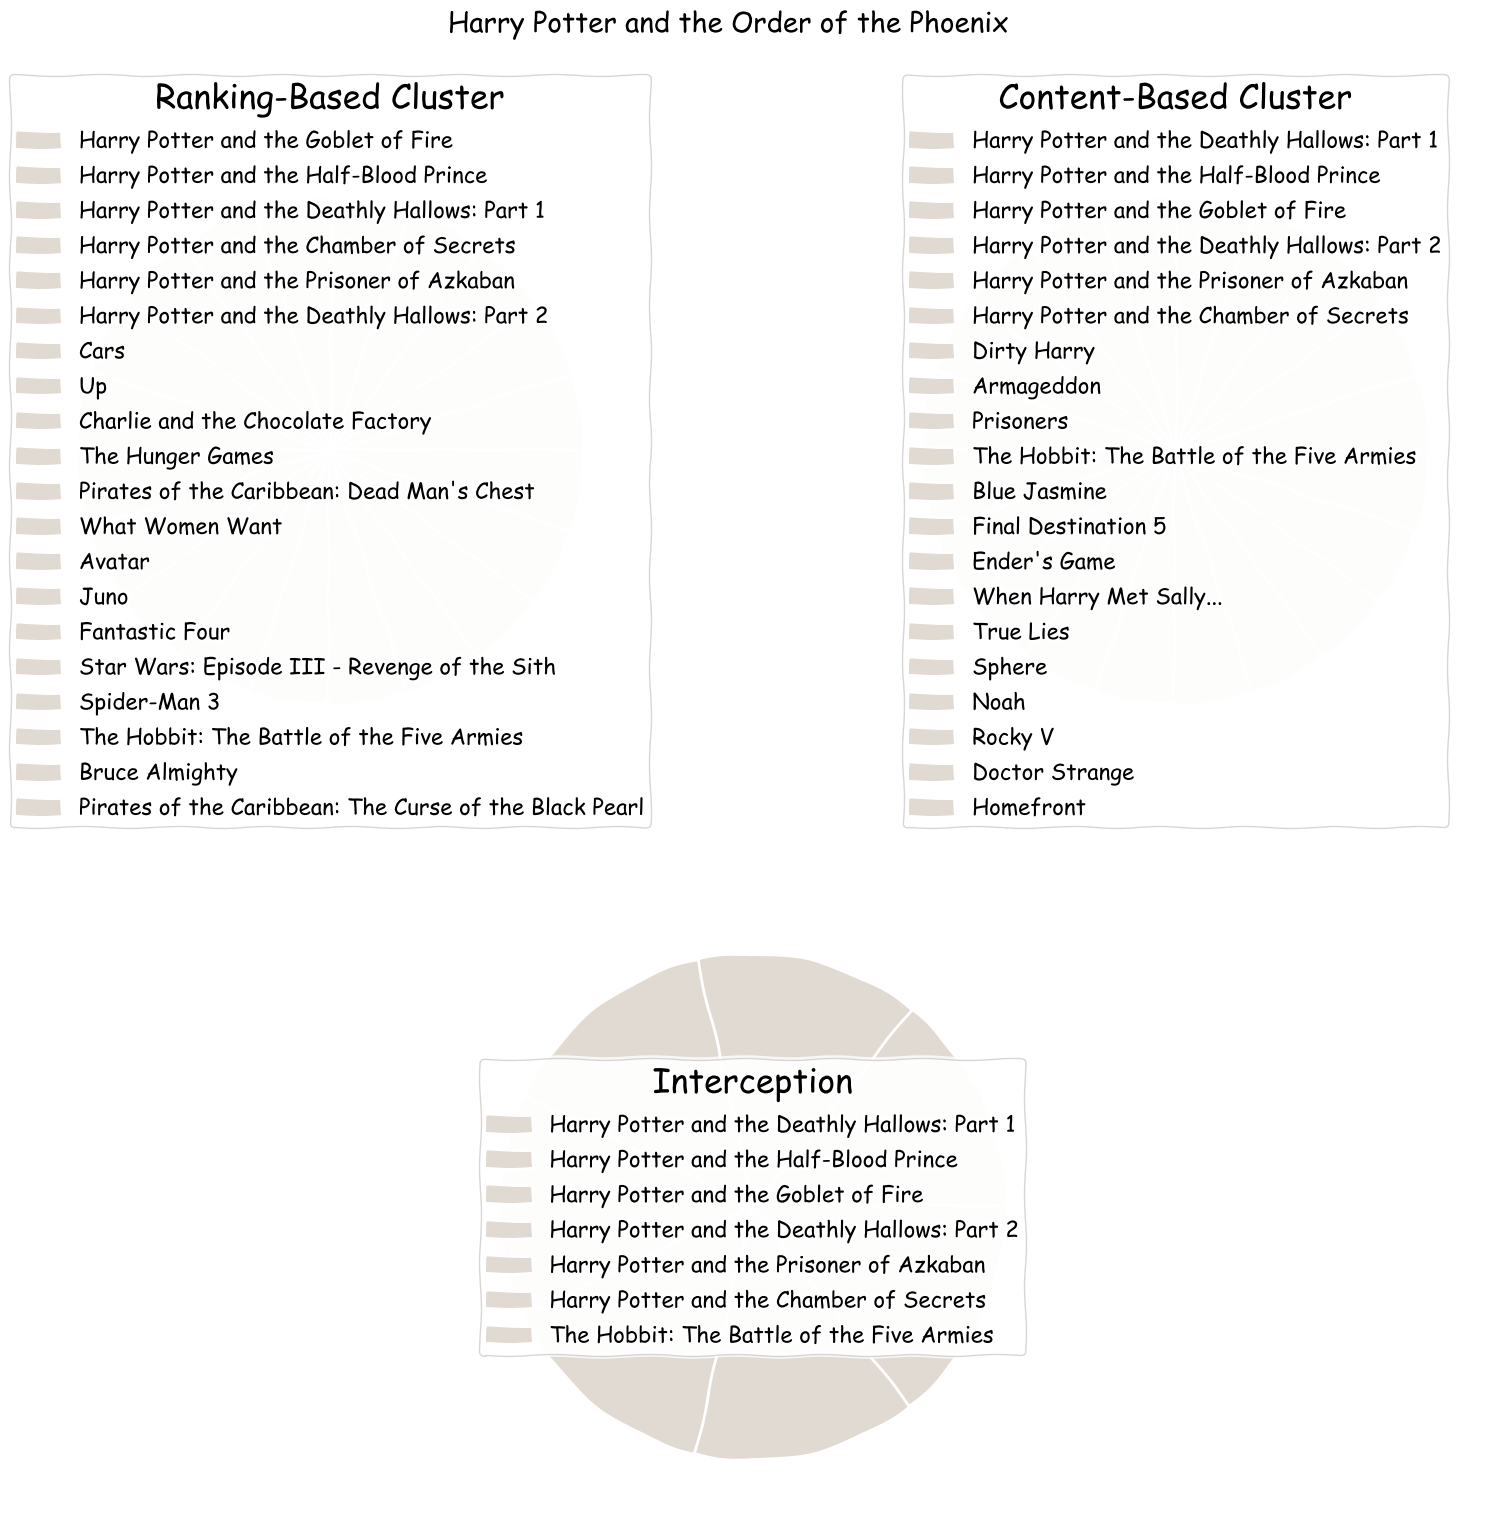

In [38]:
fig = plt.figure(figsize = (20,18))
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])
plt.suptitle(movie_name, x = 0.5, y = 0.95, fontsize = 20)

# Left diagram (Ranking - Based Cluster)
ax1.pie(x = [0.2 for i in range(1,21)], colors = ['#e1dad2']);
ax1.legend(labels = suggestions,
          title = title_rank,
          loc="center",
          title_fontsize = 'xx-large',
          borderpad = 0.3, 
          fontsize= 16);

# Right diagram (Content - Based Cluster)
ax2.pie(x = [0.2 for i in range(1,21)], colors = ['#e1dad2']);
ax2.legend(labels = get_recommendations(pivot_rating.index[i]),
            fontsize = 16,
            title = title_content,
            loc="center", 
            title_fontsize = 'xx-large',
            borderpad =0.3);

# Bottom diagram (Interception)
ax3.pie(x = [0.2 for i in range(1,len(interception)+1)],
        colors = ['#e1dad2']);
ax3.legend(labels = interception['original_title'],
          title = 'Interception',
          loc="center",
          title_fontsize = 'xx-large',
          borderpad = 0.3, 
          fontsize= 16);
plt.show();

#### Let's do one more time with another movie:
**First** code cell below is for **ranking - based** cluster;<br>
**Second** code cell below is for **content - based** cluster;

In [39]:
i = 119 # movie's index, for which we will find nearest movies 
suggestions = [] # empty list for appending the closest movies

# distances -> the cosine similarity of closest movies;
# indices means the index of similar movies;
distances, indices = model_knn.kneighbors(pivot_rating.iloc[i,:].values.reshape(1, -1), 
                                          n_neighbors = 21)

for b in range(0, len(distances.flatten())):
    
    if b == 0: 
        # the first movie, concerned movie itself
        pass
    else:
        #appending the suggested movies to suggestions list
        suggestions.append(pivot_rating.index[indices.flatten()[b]]) 

In [40]:
# df is the dataframe of movies from content based cluster
df = pd.DataFrame(get_recommendations(pivot_rating.index[i]))
# we are referring to the movie concerned on rating - based

# suggestions is the list of movies from ranking - based cluster 
interception = df[df['original_title'].isin(suggestions)]
# the case of content and rating clusters interception

In [41]:
# movie in target 
movie_name = pivot_rating.index[i]
#title for ranking-based cluster
title_rank="Ranking-Based Cluster"
#title for content-based cluster
title_content="Content-Based Cluster"

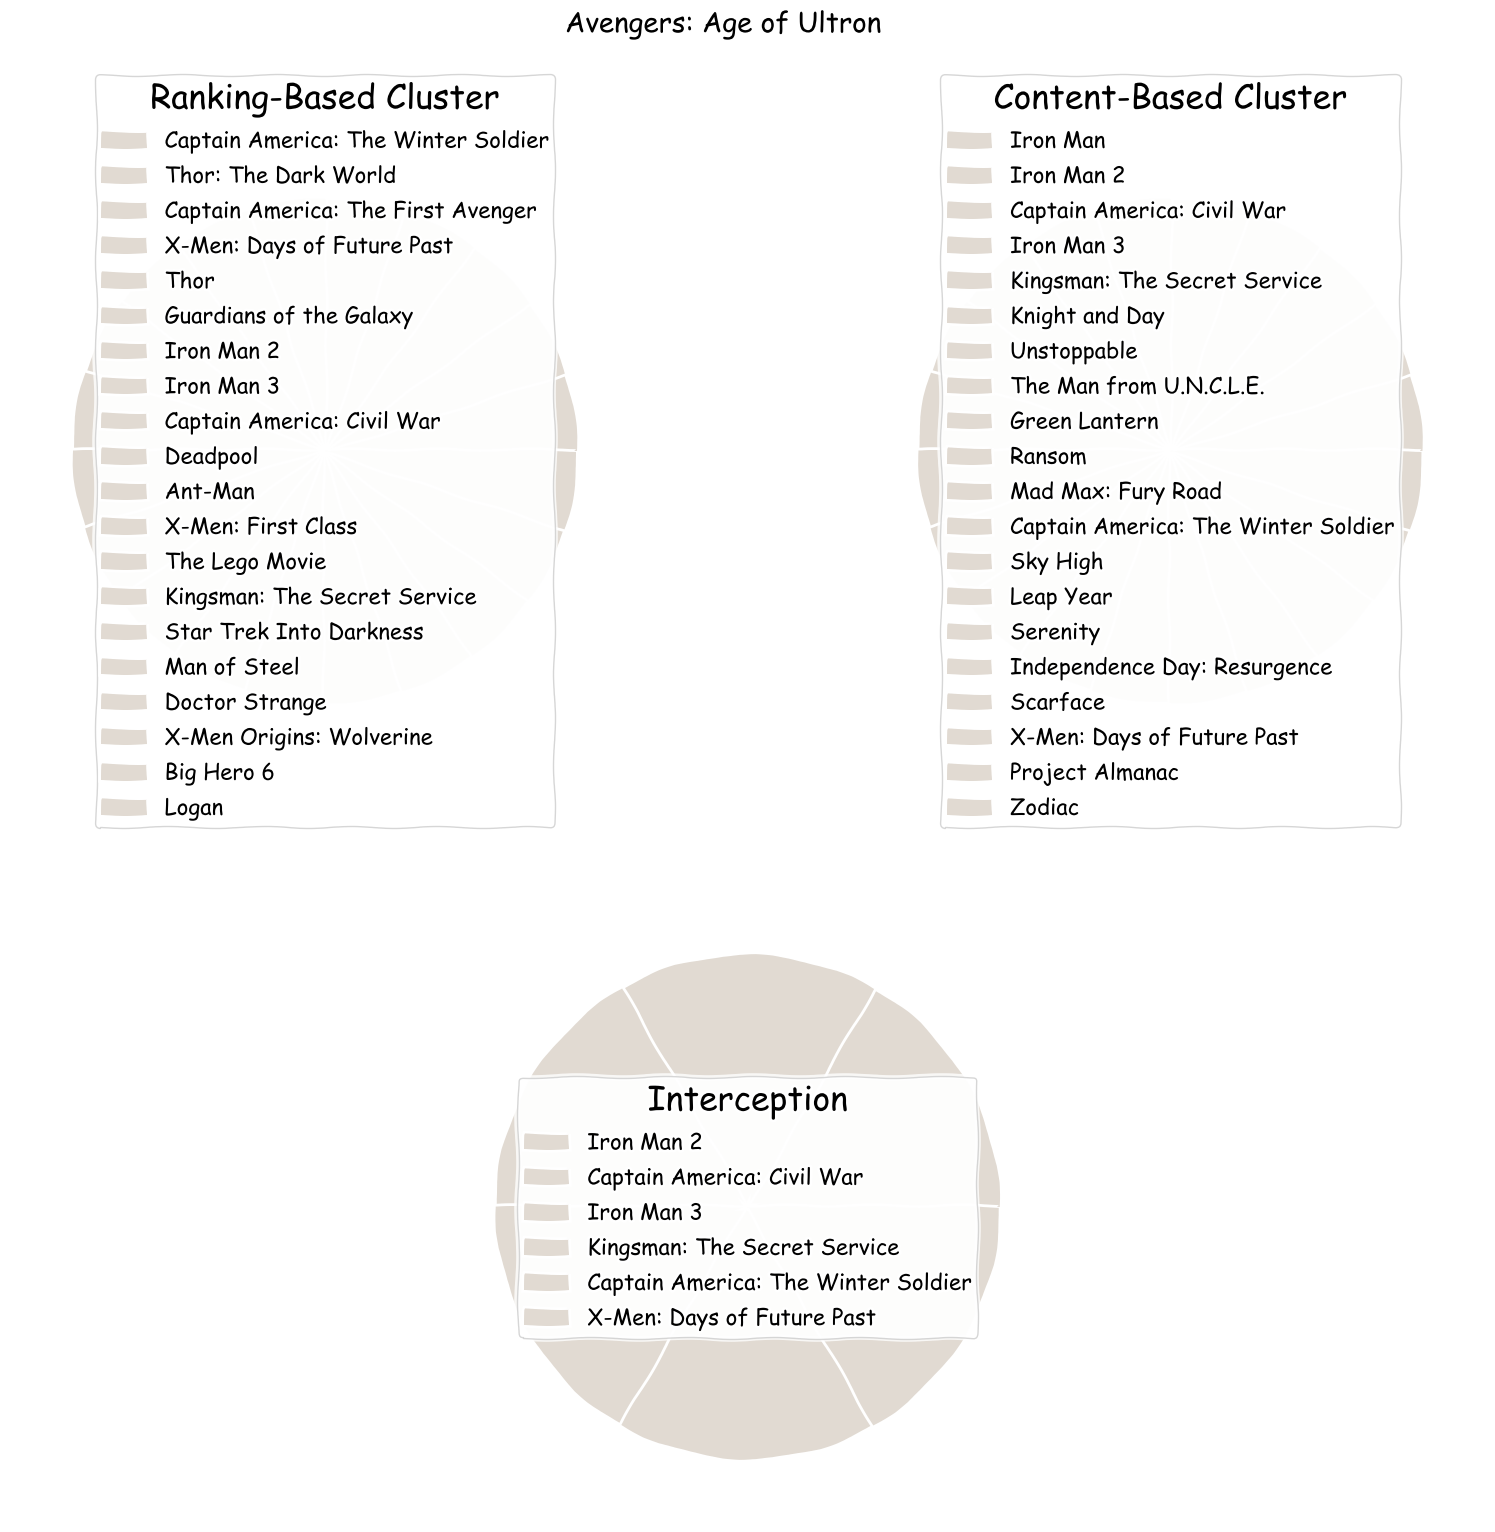

In [42]:
fig = plt.figure(figsize = (20,18))
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])
plt.suptitle(movie_name, x = 0.5, y = 0.95, fontsize = 20)

# Left diagram (Ranking - Based Cluster)
ax1.pie(x = [0.2 for i in range(1,21)],
        colors = ['#e1dad2']);
ax1.legend(labels = suggestions,
          title = title_rank,
          loc="center",
          title_fontsize = 'xx-large',
          borderpad = 0.3, 
          fontsize= 16);

# Right diagram (Content - Based Cluster)
ax2.pie(x = [0.2 for i in range(1,21)],
        colors = ['#e1dad2']);
ax2.legend(labels = get_recommendations(pivot_rating.index[i]),
            fontsize = 16,
            title = title_content,
            loc="center", 
            title_fontsize = 'xx-large',
            borderpad =0.3);

# Botttom diagram (Interception)
ax3.pie(x = [0.2 for i in range(1,len(interception)+1)],
        colors = ['#e1dad2']);
ax3.legend(labels = interception['original_title'],
          title = 'Interception',
          loc="center",
          title_fontsize = 'xx-large',
          borderpad = 0.3, 
          fontsize= 16);
plt.show();

In [44]:
!jupyter nbconvert --to webpdf --allow-chromium-download project.ipynb

[NbConvertApp] Converting notebook project.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 2336117 bytes to project.pdf
